# AlexNet model

### AlexNet with only 2 categories (Benign and Malign)

## Get packages

In [224]:
import tensorflow as tf
import os
import random
import numpy as np
from tqdm import tqdm
import albumentations as A
import cv2
from tensorflow.keras.callbacks import ReduceLROnPlateau, Callback
from skimage.io import imread
from skimage.io import imshow
from skimage.util import crop
from skimage.transform import resize
import matplotlib.pyplot as plt


from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers.legacy import Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras import models
from keras.preprocessing import image

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    
from keras.preprocessing.image import ImageDataGenerator


# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
import torchvision.models as models
from tensorflow.keras import regularizers
from keras.preprocessing.image import ImageDataGenerator

## Paths

In [287]:
TRAIN_PATH = 'archive/classification/binary/no_frame/balance/train'
TEST_PATH = 'archive/classification/binary/no_frame/balance/test'
VALID_PATH = 'archive/classification/binary/no_frame/balance/validate'

In [226]:
input_size = (3,227,227)

## Load and Prepare Images

In [288]:

# # for neaug frame
# # divisible with 259: 7, 37
# train_batchsize = 37
# # divisible with 51: 3, 17 
# valid_batchsize = 17


# #for aug frame
# # divisible with 518:  2, 259.
# train_batchsize = 2
# # divisible with 51: 3, 17 
# valid_batchsize = 3


# #for balance frame
# # divisible with 494: 2, 7, 14, 31, 62, 217
# train_batchsize = 31
# # divisible with 18: 2, 3, 6, 9
# valid_batchsize = 6

# # for neaug non-frame
# # divisible with 253: 11, 23 
# train_batchsize = 23
# # divisible with 50: 2, 5, 10, 25,
# valid_batchsize = 5


# #for aug non-frame
# # divisible with 506: 2, 11, 22, 23, 46, 253,
# train_batchsize = 22
# # divisible with 50: 2, 5, 10, 25,
# valid_batchsize = 5


#for balance non-frame
# divisible with 422: 2, 211.
train_batchsize = 2
# divisible with 16: 2, 4, 8,
valid_batchsize = 4

train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)
                                  

train_generator = train_datagen.flow_from_directory(
        TRAIN_PATH,  
        shuffle=False,
         batch_size=train_batchsize,
        target_size=input_size[1:],
        class_mode='categorical')  

validation_generator = validation_datagen.flow_from_directory(
        VALID_PATH,  
        target_size=input_size[1:],
        shuffle=False,
         batch_size=valid_batchsize,
        class_mode='categorical')


Found 422 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## Make the model

### From scatch

#### More complex

In [133]:
#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=32, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding="valid"))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(200))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
# model.add(Dropout(0.25))
model.add(Dropout(0.15))


# 2nd Fully Connected Layer
model.add(Dense(100))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.1))


# 3rd Fully Connected Layer
model.add(Dense(50))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.2))


# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 55, 55, 32)        11648     
                                                                 
 activation_53 (Activation)  (None, 55, 55, 32)        0         
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 27, 27, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 17, 17, 64)        247872    
                                                                 
 activation_54 (Activation)  (None, 17, 17, 64)        0         
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                

#### Less complex

In [289]:

model = Sequential()

# Convolutional Layers
model.add(Conv2D(32, (3, 3), input_shape=(227, 227, 3)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3),kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3),kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Dropout for regularization

model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax')) 

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 225, 225, 32)      896       
                                                                 
 activation_102 (Activation  (None, 225, 225, 32)      0         
 )                                                               
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_61 (Conv2D)          (None, 110, 110, 64)      18496     
                                                                 
 activation_103 (Activation  (None, 110, 110, 64)      0         
 )                                                               
                                                     

In [290]:
class LearningRateLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.learning_rate
        if isinstance(lr, tf.Variable) or tf.is_tensor(lr):
            lr = tf.keras.backend.get_value(lr)
        print(f" Epoch {epoch+1}: Learning rate is {lr:.6f}")

In [291]:
# Compile the model
model.compile(
              loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.legacy.RMSprop(learning_rate=0.001,decay=1e-3, momentum=0.9), 

              metrics=['accuracy'])

In [993]:
train_generator.class_indices

{'benign': 0, 'malign': 1}

## Train the model

In [292]:
# Se antreneaza modelul
checkpoiter = tf.keras.callbacks.ModelCheckpoint('model_alexnet_binary_frame_simple_balanced.h5', verbose=1, save_best_only=True)

steps = train_generator.samples//train_generator.batch_size
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=4, min_lr=0.00001, verbose=1)
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs'),
    reduce_lr,
    LearningRateLogger(),
    checkpoiter

]


results = model.fit(train_generator, 
                    validation_data=validation_generator, 
                    validation_steps=validation_generator.samples // validation_generator.batch_size,
                    steps_per_epoch = steps,
                    shuffle=True,
                    epochs=50, 
                    callbacks=callbacks,
                    verbose=1
                   )


Epoch 1/50
211/211 [==============================] - ETA: 0s - loss: 3.6144 - accuracy: 0.4929 Epoch 1: Learning rate is 0.001000

Epoch 1: val_loss improved from inf to 0.69586, saving model to model_alexnet_binary_frame_simple_balanced.h5


/Users/taras_lara/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


211/211 [==============================] - 55s 251ms/step - loss: 3.6144 - accuracy: 0.4929 - val_loss: 0.6959 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/50
211/211 [==============================] - ETA: 0s - loss: 0.6978 - accuracy: 0.5332 Epoch 2: Learning rate is 0.001000

Epoch 2: val_loss improved from 0.69586 to 0.69334, saving model to model_alexnet_binary_frame_simple_balanced.h5
211/211 [==============================] - 52s 247ms/step - loss: 0.6978 - accuracy: 0.5332 - val_loss: 0.6933 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/50
211/211 [==============================] - ETA: 0s - loss: 0.6947 - accuracy: 0.4739 Epoch 3: Learning rate is 0.001000

Epoch 3: val_loss improved from 0.69334 to 0.69325, saving model to model_alexnet_binary_frame_simple_balanced.h5
211/211 [==============================] - 45s 212ms/step - loss: 0.6947 - accuracy: 0.4739 - val_loss: 0.6933 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/50
211/211 [==============================] - ETA: 0s - los

211/211 [==============================] - ETA: 0s - loss: 0.6923 - accuracy: 0.5308 Epoch 22: Learning rate is 0.000010

Epoch 22: val_loss improved from 0.69317 to 0.69317, saving model to model_alexnet_binary_frame_simple_balanced.h5
211/211 [==============================] - 52s 245ms/step - loss: 0.6923 - accuracy: 0.5308 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 1.0000e-05
Epoch 23/50
211/211 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.4953 Epoch 23: Learning rate is 0.000010

Epoch 23: val_loss improved from 0.69317 to 0.69317, saving model to model_alexnet_binary_frame_simple_balanced.h5
211/211 [==============================] - 53s 253ms/step - loss: 0.6935 - accuracy: 0.4953 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 1.0000e-05
Epoch 24/50
211/211 [==============================] - ETA: 0s - loss: 0.6940 - accuracy: 0.4787 Epoch 24: Learning rate is 0.000010

Epoch 24: val_loss improved from 0.69317 to 0.69317, saving model to model_ale

211/211 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5047 Epoch 43: Learning rate is 0.000010

Epoch 43: val_loss did not improve from 0.69317
211/211 [==============================] - 39s 183ms/step - loss: 0.6931 - accuracy: 0.5047 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 1.0000e-05
Epoch 44/50
211/211 [==============================] - ETA: 0s - loss: 0.6942 - accuracy: 0.4739 Epoch 44: Learning rate is 0.000010

Epoch 44: val_loss did not improve from 0.69317
211/211 [==============================] - 25s 116ms/step - loss: 0.6942 - accuracy: 0.4739 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 1.0000e-05
Epoch 45/50
211/211 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.4858 Epoch 45: Learning rate is 0.000010

Epoch 45: val_loss improved from 0.69317 to 0.69317, saving model to model_alexnet_binary_frame_simple_balanced.h5
211/211 [==============================] - 39s 183ms/step - loss: 0.6938 - accuracy: 0.4858 - val

### For export

In [36]:
import pickle
history = results.history

# Pickle the history to file
with open('alexnet_simple.pkl', 'wb') as f:
    pickle.dump(history, f)


In [38]:
acc = history['accuracy']
acc= np.mean(acc)
# acc=np.sort(acc)
# acc=acc[-5]
print('Accuracy Score = ', acc)

Accuracy Score =  0.7965737706422806


## Results

In [293]:
print('Accuracy Score = ',np.max(results.history['val_accuracy']))
print('Loss Score = ',np.min(results.history['val_loss']))

Accuracy Score =  0.5
Loss Score =  0.6931676268577576


### During training

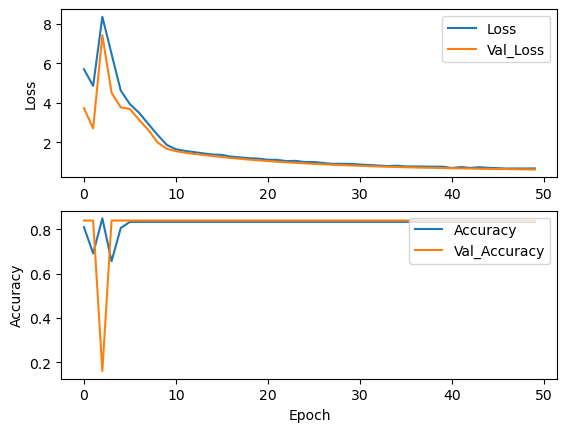

In [279]:
plt.figure()
plt.subplot(211)
loss_train_curve = results.history["loss"]
loss_val_curve = results.history["val_loss"] 

plt.plot(loss_train_curve, label = "Loss")
plt.plot(loss_val_curve, label = "Val_Loss")
plt.legend(loc = 'upper right')
plt.ylabel("Loss")


plt.subplot(212)
acc_train_curve = results.history["accuracy"] 

acc_val_curve = results.history["val_accuracy"]

plt.plot(acc_train_curve, label = "Accuracy")
plt.plot(acc_val_curve, label = "Val_Accuracy")
plt.legend(loc = 'upper right')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

## Test the model

In [294]:
# divisible with 36: 2, 3, 4, 6, 9, 12, 18
test_batch_size = 1

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=input_size[1:],
    batch_size=test_batch_size,
    shuffle=False,
class_mode='categorical')
scores = model.evaluate(test_generator,workers=12)
print(scores)

Found 36 images belonging to 2 classes.
36/36 [==============================] - 2s 44ms/step - loss: 0.6946 - accuracy: 0.1944
[0.694567859172821, 0.1944444477558136]


In [295]:
target_names = list(test_generator.class_indices.keys())
print(target_names)

['benign', 'malign ']


### Make prediction

In [296]:
test_generator.reset()

Y_pred = model.predict(test_generator, verbose=1)

y_pred = np.argmax(Y_pred, axis=-1)
classes = test_generator.classes

print(classes)
print(y_pred)

print(sum(y_pred==classes)/len(test_generator.classes))

36/36 [==============================] - 2s 38ms/step
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.19444444444444445


### Confusion Matrix

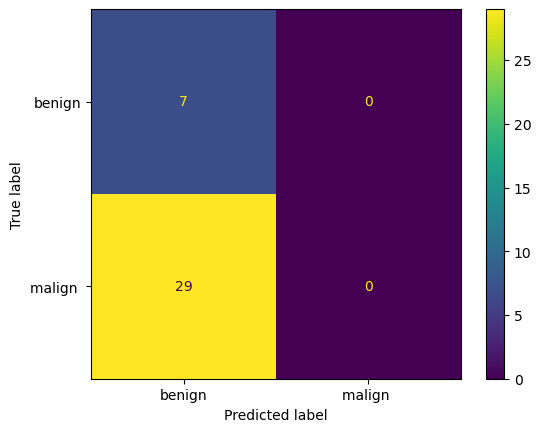

In [297]:

cm = confusion_matrix(classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot()
plt.grid(False)
plt.show()

### Metrics

In [298]:
TN, FP, FN, TP = cm.ravel()

In [299]:
print("True positive=",TP)
print("True Negative=",TN)
print("False positive=",FP)
print("False Negative=",FN)

True positive= 0
True Negative= 7
False positive= 0
False Negative= 29


In [300]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
#F1_SCORE
FSCO=(2*TP) / ((2*TP) +FP + FN) 
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

/var/folders/ml/1pq8pf157qjcrdxwm5xjgzfm0000gn/T/ipykernel_1302/1327457140.py:6: RuntimeWarning: invalid value encountered in long_scalars
  PPV = TP/(TP+FP)
/var/folders/ml/1pq8pf157qjcrdxwm5xjgzfm0000gn/T/ipykernel_1302/1327457140.py:14: RuntimeWarning: invalid value encountered in long_scalars
  FDR = FP/(TP+FP)


In [301]:
print("sensitivity=",round(TPR*100,3),"%")
print("precision=",round(PPV*100,3),"%")
print("Specificity=",round(TNR*100,3),"%")
print("F-score=",round(FSCO*100,3),"%")
print("ACCURACY=",round(ACC*100,3),"%")
print("FNR=",FNR*100,"%")
print("FPR=",FPR*100,"%")
print("NPV=",NPV*100,"%")

sensitivity= 0.0 %
precision= nan %
Specificity= 100.0 %
F-score= 0.0 %
ACCURACY= 19.444 %
FNR= 100.0 %
FPR= 0.0 %
NPV= 19.444444444444446 %
